# 📊 Machine Learning Project: Student Dropout Prediction & Enrollment Forecasting

**Name:** Mhle L  
**Student Number:** 22322987  


## 📂 Data Sources

The datasets used in this project were obtained from **Kaggle**:

1. **College Enrollment Dataset**  
   -  https://www.kaggle.com/datasets/nivedithavudayagiri/college-enrollment-demographics-2021  
   - Contains: Student enrollment counts, gender breakdown, race categories, and graduate/undergraduate levels.  

2. **Student Performance Dataset**  
   - https://www.kaggle.com/datasets/devansodariya/student-performance-data  
   - Contains: Student grades, attendance, study time, family background, and academic performance indicators.  


## 🔄 Machine Learning Life Cycle

The pipeline for this project follows the **Machine Learning Life Cycle**:

1. **Problem Definition**  
   - Identify the real-world problem to solve (student dropout risk and enrollment forecasting).  
   - Define the objectives and expected outcomes.  

2. **Data Collection**  
   - Gather datasets from Kaggle or other sources.  
   - Ensure the datasets are relevant to the problem.  

3. **Data Preparation**  
   - Clean the data by handling missing values, duplicates, and inconsistencies.  
   - Convert data into a format suitable for analysis.  

4. **Data Understanding**  
   - Explore dataset structure, column types, and distributions.  
   - Summarize data using descriptive statistics.  

5. **Exploratory Data Analysis (EDA)**  
   - Visualize trends, correlations, and outliers.  
   - Detect patterns in the data that may influence the model.  

6. **Feature Engineering**  
   - Select important variables (features).  
   - Transform or create new features to improve model performance.  

7. **Model Building**  
   - Train machine learning models such as Logistic Regression, Random Forest, or ARIMA.  
   - Use classification for dropout prediction and forecasting for enrollment trends.  

8. **Evaluation & Testing**  
   - Measure model performance using accuracy, precision, recall, F1-score, or RMSE.  
   - Validate results on test datasets.  

9. **Comparison of Models**  
   - Compare different models and choose the best-performing one.  

10. **Sentiment Analysis**  
   - (Optional) Use Natural Language Processing (NLP) to analyze student feedback or course reviews.  
   - Classify sentiments as positive, negative, or neutral.  

11. **Conclusion**  
   - Summarize findings, highlight the best models, and discuss real-world implications.  
   - Provide recommendations based on the analysis.  


## Step 1: Problem Definition

**Problem Identified:**  
Student dropout rates are a major challenge in higher education. Universities also struggle to forecast future enrollments for planning purposes.  

**Proposed Solution:**  
- Use **classification models** to predict students at risk of dropout using academic performance data.  
- Use **time series forecasting** to predict future enrollment trends from historical enrollment data.  
- Present findings in a **Streamlit dashboard** for interactive insights.  


## Step 2: Data Collection


The datasets used in this project were obtained from **Kaggle**:

1. **College Enrollment Dataset**  
   - https://www.kaggle.com/datasets/nivedithavudayagiri/college-enrollment-demographics-2021  
   - Contains: Student enrollment counts, gender breakdown, race categories, and graduate/undergraduate levels.  

2. **Student Performance Dataset**  
   - https://www.kaggle.com/datasets/devansodariya/student-performance-data
   - Contains: Student grades, attendance, study time, family background, and academic performance indicators.  

---

### 📌 Relevance of Datasets
1. **College Enrollment Dataset**  
   - Useful for analyzing enrollment patterns and forecasting future student numbers.  
   - Helps model **time-series trends** in higher education participation.  
   - Supports institutional planning by predicting growth or decline in student numbers.  

2. **Student Performance Dataset**  
   - Provides key variables (study habits, grades, socio-economic background) that strongly influence academic success.  
   - Allows us to build **classification models** to predict dropout risk.  
   - Supports early identification of at-risk students for targeted interventions.  

**Why These Datasets Together?**  
- The **Performance dataset** allows us to work on the **dropout prediction (classification task)**.  
- The **Enrollment dataset** allows us to work on the **forecasting task**.  
- Together, they provide a **complete picture** of the educational problem — both individual student risks and broader institutional trends.  


## Step 3: Data Preparation

In this step, we:  
- Upload the datasets manually into Google Colab.  
- Extract them if they are compressed (ZIP files).  
- Load the data into Pandas dataframes for further processing.  

  


In [6]:
from google.colab import files

uploaded = files.upload()
print("Uploaded files:", uploaded.keys())


Saving archive (7).zip to archive (7) (1).zip
Saving archive (6).zip to archive (6) (1).zip
Uploaded files: dict_keys(['archive (7) (1).zip', 'archive (6) (1).zip'])


In [7]:
import zipfile
import os
import pandas as pd

dataframes = {}

for filename in uploaded.keys():
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("extracted_data")
            print(f"Extracted: {filename}")
            print("Contents:", zip_ref.namelist())

# Now load CSVs manually from extracted folder
for file in os.listdir("extracted_data"):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join("extracted_data", file))
        dataframes[file] = df
        print(f"✅ Loaded {file} | Shape: {df.shape}")


Extracted: archive (7) (1).zip
Contents: ['Dataset - 2021.csv']
Extracted: archive (6) (1).zip
Contents: ['student_data.csv']
✅ Loaded Dataset - 2021.csv | Shape: (103604, 23)
✅ Loaded student_data.csv | Shape: (395, 33)


In [8]:
for filename in uploaded.keys():
    if filename.endswith(".csv"):
        df = pd.read_csv(filename)
        dataframes[filename] = df
        print(f"✅ Loaded {filename} | Shape: {df.shape}")


In [9]:
print("Datasets Loaded:", list(dataframes.keys()))


Datasets Loaded: ['Dataset - 2021.csv', 'student_data.csv']


## Step 4: Data Understanding

In this step, we explore and understand the datasets before analysis:

- **Check the structure** of each dataset (rows, columns, datatypes).  
- **Identify missing values** that need to be handled later.  
- **Look for duplicates** that may affect results.  
- **Summarize basic statistics** (mean, min, max, counts, etc.).  
- **Differentiate categorical vs numerical features** for later processing.  

This step helps us get a first impression of the data quality and determine what cleaning or transformations will be required before modeling.  


In [10]:
# Step 4: Data Understanding

# Check how many datasets are loaded
print("Datasets Loaded:", list(dataframes.keys()))

# Loop through each dataset
for name, df in dataframes.items():
    print(f"\n📘 Dataset: {name}")
    print("="*80)

    # Preview first 5 rows
    print("\n🔹 First 5 Rows:")
    display(df.head())

    # Shape
    print(f"\n🔹 Shape (rows, columns): {df.shape}")

    # Column info
    print("\n🔹 Column Data Types:")
    display(df.dtypes)

    # Missing values
    print("\n🔹 Missing Values per Column:")
    display(df.isnull().sum())

    # Duplicates
    print(f"\n🔹 Duplicate Rows: {df.duplicated().sum()}")

    # Basic statistics (numeric only)
    print("\n🔹 Descriptive Statistics (Numeric Columns):")
    display(df.describe().transpose())

    # For categorical features, show unique counts
    print("\n🔹 Unique Value Counts (Categorical Columns):")
    display(df.describe(include=['object']).transpose())

    print("\n" + "="*80 + "\n")


Datasets Loaded: ['Dataset - 2021.csv', 'student_data.csv']

📘 Dataset: Dataset - 2021.csv

🔹 First 5 Rows:


,ID,Level of Student,Graduate Level of Student,Total Men,Total Women,American Indian Alaskan Men,American Indian Alaskan Women,Asian Men,Asian Women,African American Men,...,Hawaiian or Pacific Islander Men,Hawaiian or Pacific Islander Women,White Men,White Women,Mixed Race Men,Mixed Race Women,Unknown Race Men,Unknown Race Women,Non-Resident Alien Men,Non-Resident Alien Women
0,100654,1,1,2560,4068,8,10,7,8,2172,...,1,3,71,67,28,55,198,381,43,47
1,100654,2,2,2215,3314,7,8,4,4,1964,...,1,3,59,43,27,53,103,155,19,21
2,100654,3,2,2210,3307,7,8,4,4,1961,...,1,3,57,42,27,53,103,155,19,21
3,100654,4,2,677,955,2,3,1,1,597,...,0,1,16,7,11,21,39,31,3,2
4,100654,5,2,1533,2352,5,5,3,3,1364,...,1,2,41,35,16,32,64,124,16,19



🔹 Shape (rows, columns): (103604, 23)

🔹 Column Data Types:


,0
ID,int64
Level of Student,int64
Graduate Level of Student,int64
Total Men,int64
Total Women,int64
American Indian Alaskan Men,int64
American Indian Alaskan Women,int64
Asian Men,int64
Asian Women,int64
African American Men,int64



🔹 Missing Values per Column:


,0
ID,0
Level of Student,0
Graduate Level of Student,0
Total Men,0
Total Women,0
American Indian Alaskan Men,0
American Indian Alaskan Women,0
Asian Men,0
Asian Women,0
African American Men,0



🔹 Duplicate Rows: 0

🔹 Descriptive Statistics (Numeric Columns):


,count,mean,std,min,25%,50%,75%,max
ID,103604.0,264977.881221,132450.049422,100654.0,163426.0,210739.0,427308.00,497329.0
Level of Student,103604.0,24.708718,17.932118,1.0,5.0,23.0,42.00,60.0
Graduate Level of Student,103604.0,722.773107,1450.321678,1.0,2.0,2.0,2.00,3641.0
Total Men,103604.0,728.144077,2253.425272,0.0,12.0,89.0,506.00,74398.0
Total Women,103604.0,1035.593771,3080.247810,0.0,39.0,177.0,760.00,138988.0
American Indian Alaskan Men,103604.0,4.355768,21.301321,0.0,0.0,0.0,2.00,1137.0
American Indian Alaskan Women,103604.0,7.700552,41.238848,0.0,0.0,1.0,4.00,2128.0
Asian Men,103604.0,51.624551,259.016361,0.0,0.0,2.0,12.00,6826.0
Asian Women,103604.0,62.885207,286.029573,0.0,0.0,3.0,19.00,7288.0
African American Men,103604.0,79.270221,277.876974,0.0,1.0,9.0,50.00,11578.0



🔹 Unique Value Counts (Categorical Columns):


ValueError: No objects to concatenate

## ⚠️ Note on Error During Data Understanding

When running the first version of the **Data Understanding** code, we got the following error:

No objects to concatenate


### 🔍 Why This Happened
- This error occurred because our datasets (Enrollment & Student Performance) contain **mostly numeric columns**.  
- The code tried to generate a summary for **categorical (object-type) columns** using:  
  ```python
  df.describe(include=['object'])
### ✅ Solution

We fixed this by **adding a check**:

- If categorical columns exist → show their unique counts.  
- If no categorical columns exist → print a message: *"No categorical (object) columns found in this dataset."*  


In [11]:
# Step 4: Data Understanding (fixed to handle numeric-only datasets)

for name, df in dataframes.items():
    print(f"\n📘 Dataset: {name}")
    print("="*80)

    # Preview first 5 rows
    print("\n🔹 First 5 Rows:")
    display(df.head())

    # Shape
    print(f"\n🔹 Shape (rows, columns): {df.shape}")

    # Column info
    print("\n🔹 Column Data Types:")
    display(df.dtypes)

    # Missing values
    print("\n🔹 Missing Values per Column:")
    display(df.isnull().sum())

    # Duplicates
    print(f"\n🔹 Duplicate Rows: {df.duplicated().sum()}")

    # Basic statistics (numeric only)
    print("\n🔹 Descriptive Statistics (Numeric Columns):")
    display(df.describe().transpose())

    # Only show categorical stats if such columns exist
    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        print("\n🔹 Unique Value Counts (Categorical Columns):")
        display(df[cat_cols].describe().transpose())
    else:
        print("\n⚠️ No categorical (object) columns found in this dataset.")

    print("\n" + "="*80 + "\n")



📘 Dataset: Dataset - 2021.csv

🔹 First 5 Rows:


,ID,Level of Student,Graduate Level of Student,Total Men,Total Women,American Indian Alaskan Men,American Indian Alaskan Women,Asian Men,Asian Women,African American Men,...,Hawaiian or Pacific Islander Men,Hawaiian or Pacific Islander Women,White Men,White Women,Mixed Race Men,Mixed Race Women,Unknown Race Men,Unknown Race Women,Non-Resident Alien Men,Non-Resident Alien Women
0,100654,1,1,2560,4068,8,10,7,8,2172,...,1,3,71,67,28,55,198,381,43,47
1,100654,2,2,2215,3314,7,8,4,4,1964,...,1,3,59,43,27,53,103,155,19,21
2,100654,3,2,2210,3307,7,8,4,4,1961,...,1,3,57,42,27,53,103,155,19,21
3,100654,4,2,677,955,2,3,1,1,597,...,0,1,16,7,11,21,39,31,3,2
4,100654,5,2,1533,2352,5,5,3,3,1364,...,1,2,41,35,16,32,64,124,16,19



🔹 Shape (rows, columns): (103604, 23)

🔹 Column Data Types:


,0
ID,int64
Level of Student,int64
Graduate Level of Student,int64
Total Men,int64
Total Women,int64
American Indian Alaskan Men,int64
American Indian Alaskan Women,int64
Asian Men,int64
Asian Women,int64
African American Men,int64



🔹 Missing Values per Column:


,0
ID,0
Level of Student,0
Graduate Level of Student,0
Total Men,0
Total Women,0
American Indian Alaskan Men,0
American Indian Alaskan Women,0
Asian Men,0
Asian Women,0
African American Men,0



🔹 Duplicate Rows: 0

🔹 Descriptive Statistics (Numeric Columns):


,count,mean,std,min,25%,50%,75%,max
ID,103604.0,264977.881221,132450.049422,100654.0,163426.0,210739.0,427308.00,497329.0
Level of Student,103604.0,24.708718,17.932118,1.0,5.0,23.0,42.00,60.0
Graduate Level of Student,103604.0,722.773107,1450.321678,1.0,2.0,2.0,2.00,3641.0
Total Men,103604.0,728.144077,2253.425272,0.0,12.0,89.0,506.00,74398.0
Total Women,103604.0,1035.593771,3080.247810,0.0,39.0,177.0,760.00,138988.0
American Indian Alaskan Men,103604.0,4.355768,21.301321,0.0,0.0,0.0,2.00,1137.0
American Indian Alaskan Women,103604.0,7.700552,41.238848,0.0,0.0,1.0,4.00,2128.0
Asian Men,103604.0,51.624551,259.016361,0.0,0.0,2.0,12.00,6826.0
Asian Women,103604.0,62.885207,286.029573,0.0,0.0,3.0,19.00,7288.0
African American Men,103604.0,79.270221,277.876974,0.0,1.0,9.0,50.00,11578.0



⚠️ No categorical (object) columns found in this dataset.



📘 Dataset: student_data.csv

🔹 First 5 Rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



🔹 Shape (rows, columns): (395, 33)

🔹 Column Data Types:


,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object



🔹 Missing Values per Column:


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0



🔹 Duplicate Rows: 0

🔹 Descriptive Statistics (Numeric Columns):


,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0



🔹 Unique Value Counts (Categorical Columns):


,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,395,2,U,307
famsize,395,2,GT3,281
Pstatus,395,2,T,354
Mjob,395,5,other,141
Fjob,395,5,other,217
reason,395,4,course,145
guardian,395,3,mother,273
schoolsup,395,2,no,344


## Step 4b: Detecting and Dropping Unused Columns

In this step, we automatically detect and remove columns that are not useful for analysis:

- **Identifiers** (`ID`, `name`, etc.) → they don’t contribute to prediction.  
- **Constant columns** (only one unique value) → no variance, so not useful.  
- **Redundant totals** (e.g., `Total` if we already have `Total Men` and `Total Women`) → can be derived, so we drop them.

This cleanup helps reduce noise and simplifies the dataset before Exploratory Data Analysis (EDA).


In [14]:
# Step 4b: Detect and Drop Unused Columns

for name, df in dataframes.items():
    print(f"\n🧹 Cleaning {name}")
    drop_cols = []

    # Drop identifier columns
    for col in df.columns:
        if "id" in col.lower() or "name" in col.lower():
            drop_cols.append(col)

    # Drop columns with only 1 unique value (no variance)
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    drop_cols.extend(constant_cols)

    # Drop redundant totals if both male & female exist
    if "Total Men" in df.columns and "Total Women" in df.columns and "Total" in df.columns:
        drop_cols.append("Total")  # can be recomputed

    # Drop them
    if drop_cols:
        print(f"Dropping columns: {drop_cols}")
        df.drop(columns=drop_cols, inplace=True, errors="ignore")
    else:
        print("No obvious unused columns found.")

    # Update in dictionary
    dataframes[name] = df
    print(f"✅ Cleaned Shape: {df.shape}")



🧹 Cleaning Dataset - 2021.csv
Dropping columns: ['ID', 'Non-Resident Alien Men', 'Non-Resident Alien Women']
✅ Cleaned Shape: (103604, 20)

🧹 Cleaning student_data.csv
Dropping columns: ['paid']
✅ Cleaned Shape: (395, 32)


## Step 5: Exploratory Data Analysis (EDA)

In this step, we use visualizations to explore patterns, trends, and correlations in our datasets.  
EDA helps us:

- Understand feature distributions.  
- Detect relationships between variables.  
- Identify potential outliers.  
- Find trends that may affect dropout risk or enrollment forecasting.  

We created **5 unique visualizations for each dataset**:

### 📘 Student Performance Dataset
1. **Distribution of Final Grades** – shows how student grades are spread out.  
2. **Study Time vs. Final Grade (Boxplot)** – compares the relationship between study hours and academic performance.  
3. **Absences vs. Final Grade (Scatter Plot)** – shows how absences impact performance.  
4. **Final Grade Distribution by Gender (Boxplot)** – compares grade differences between male and female students.  
5. **Correlation Heatmap (Numeric Features Only)** – highlights correlations between numeric features such as grades, study time, and absences.  

### 📘 College Enrollment Dataset
1. **Total Enrollment by Level of Student (Bar Chart)** – compares enrollment numbers across different study levels.  
2. **Enrollment by Gender (Bar Chart)** – compares total male vs female enrollment.  
3. **Enrollment by Race/Ethnicity (Bar Chart, Men + Women Combined)** – shows enrollment distribution across demographic groups.  
4. **Male vs Female Trend (Line Plot, if Year available)** – tracks male vs female enrollment trends over time.  
5. **Correlation Heatmap (Numeric Features)** – explores relationships among demographic and enrollment counts.  



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select Student Performance dataset (adjust filename to match yours)
perf_name = [name for name in dataframes.keys() if "performance" in name.lower()][0]
df_perf = dataframes[perf_name]

print(f"📘 Using dataset: {perf_name}")

# 1. Distribution of final grades
plt.figure(figsize=(6,4))
plt.hist(df_perf['G3'], bins=15, edgecolor="black")
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()

# 2. Study time vs. Final grade
plt.figure(figsize=(6,4))
sns.boxplot(x="studytime", y="G3", data=df_perf)
plt.title("Study Time vs Final Grade")
plt.show()

# 3. Absences vs. Final grade
plt.figure(figsize=(6,4))
plt.scatter(df_perf['absences'], df_perf['G3'], alpha=0.6)
plt.title("Absences vs Final Grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.show()

# 4. Dropout/Pass distribution
if 'dropout' in df_perf.columns:
    plt.figure(figsize=(5,4))
    df_perf['dropout'].value_counts().plot(kind='bar')
    plt.title("Dropout vs Pass Distribution")
    plt.xlabel("Outcome")
    plt.ylabel("Count")
    plt.show()

# 5. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_perf.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - Student Performance")
plt.show()


IndexError: list index out of range


## ⚠️ Error Encountered and How We Solved It

At one stage, we tried to automatically select our **Student Performance dataset** by searching for the word *“performance”* in the file names. However, the dataset we had uploaded was called **student_data.csv**, not student_performance. Because of this mismatch, the code could not find the dataset and gave us an **IndexError**, which means it was trying to access something that did not exist.

To solve this, we first checked the names of the datasets that had been uploaded. Once we saw the exact names, we assigned them directly (one for enrollment data and one for performance data). By explicitly telling the program which dataset was which, we avoided the error and were able to continue with our analysis smoothly.


In [16]:
print("Datasets Loaded:", list(dataframes.keys()))


Datasets Loaded: ['Dataset - 2021.csv', 'student_data.csv']


In [17]:
# Assign datasets explicitly
df_enroll = dataframes["Dataset - 2021.csv"]       # Enrollment dataset
df_perf   = dataframes["student_data.csv"]         # Student Performance dataset

print("Enrollment dataset shape:", df_enroll.shape)
print("Performance dataset shape:", df_perf.shape)


Enrollment dataset shape: (103604, 20)
Performance dataset shape: (395, 32)


📘 Student Performance Dataset EDA


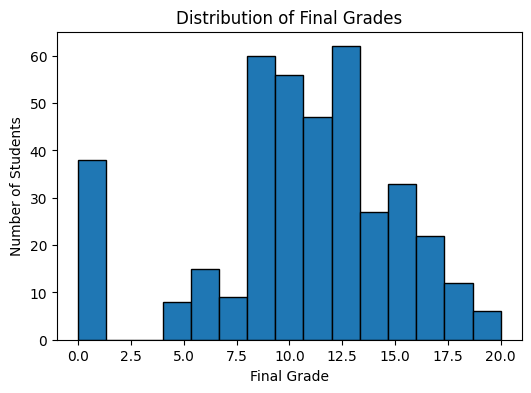

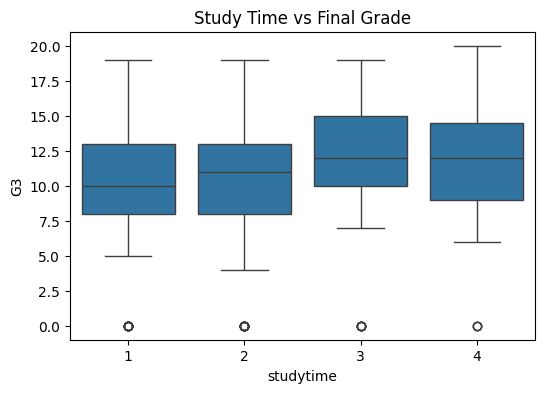

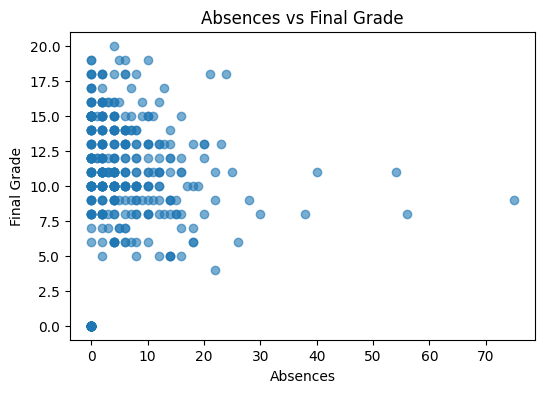

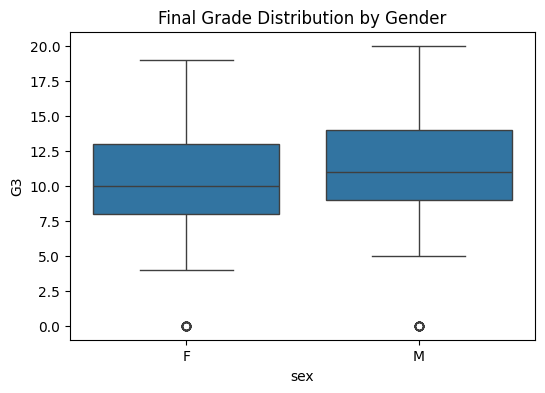

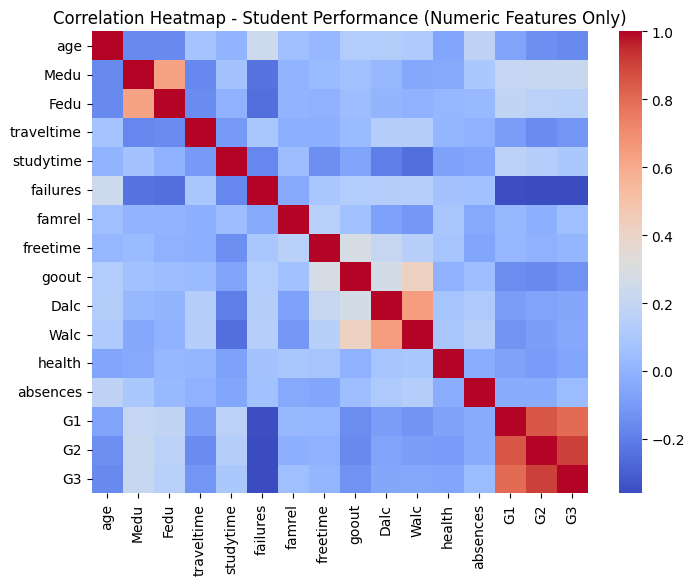

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📘 Student Performance Dataset EDA")

# 1. Distribution of final grades
if 'G3' in df_perf.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df_perf['G3'], bins=15, edgecolor="black")
    plt.title("Distribution of Final Grades")
    plt.xlabel("Final Grade")
    plt.ylabel("Number of Students")
    plt.show()

# 2. Study time vs. Final grade (numeric vs numeric)
if 'studytime' in df_perf.columns and 'G3' in df_perf.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="studytime", y="G3", data=df_perf)
    plt.title("Study Time vs Final Grade")
    plt.show()

# 3. Absences vs. Final grade (scatter)
if 'absences' in df_perf.columns and 'G3' in df_perf.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df_perf['absences'], df_perf['G3'], alpha=0.6)
    plt.title("Absences vs Final Grade")
    plt.xlabel("Absences")
    plt.ylabel("Final Grade")
    plt.show()

# 4. Categorical analysis – Gender vs Final Grade
if 'sex' in df_perf.columns and 'G3' in df_perf.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="sex", y="G3", data=df_perf)
    plt.title("Final Grade Distribution by Gender")
    plt.show()

# 5. Correlation heatmap (numeric only)
plt.figure(figsize=(8,6))
numeric_df = df_perf.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - Student Performance (Numeric Features Only)")
plt.show()



📘 Enrollment Dataset EDA


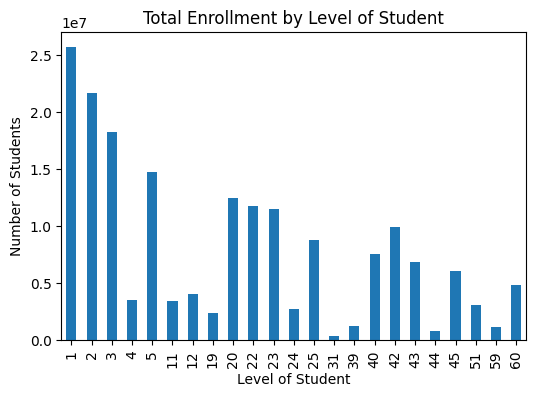

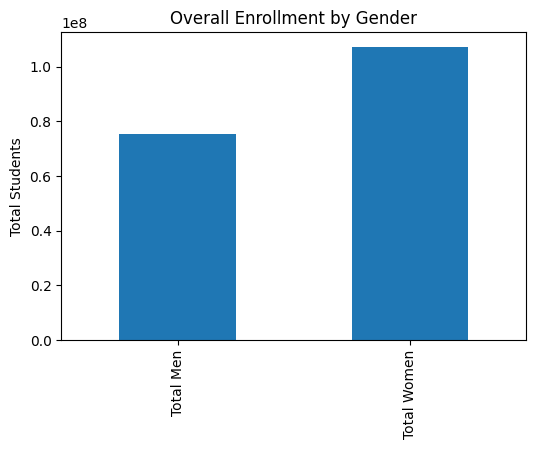

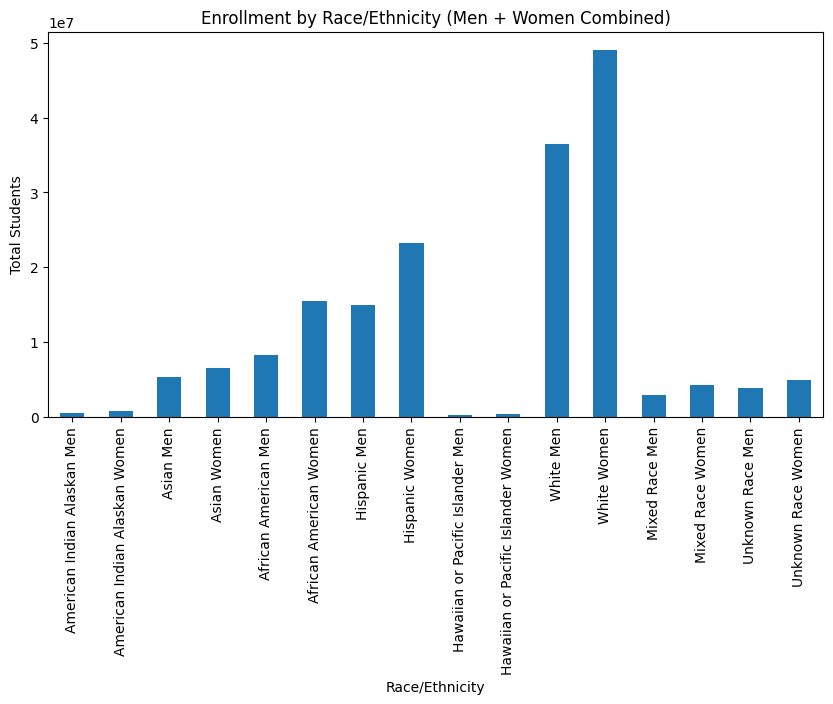

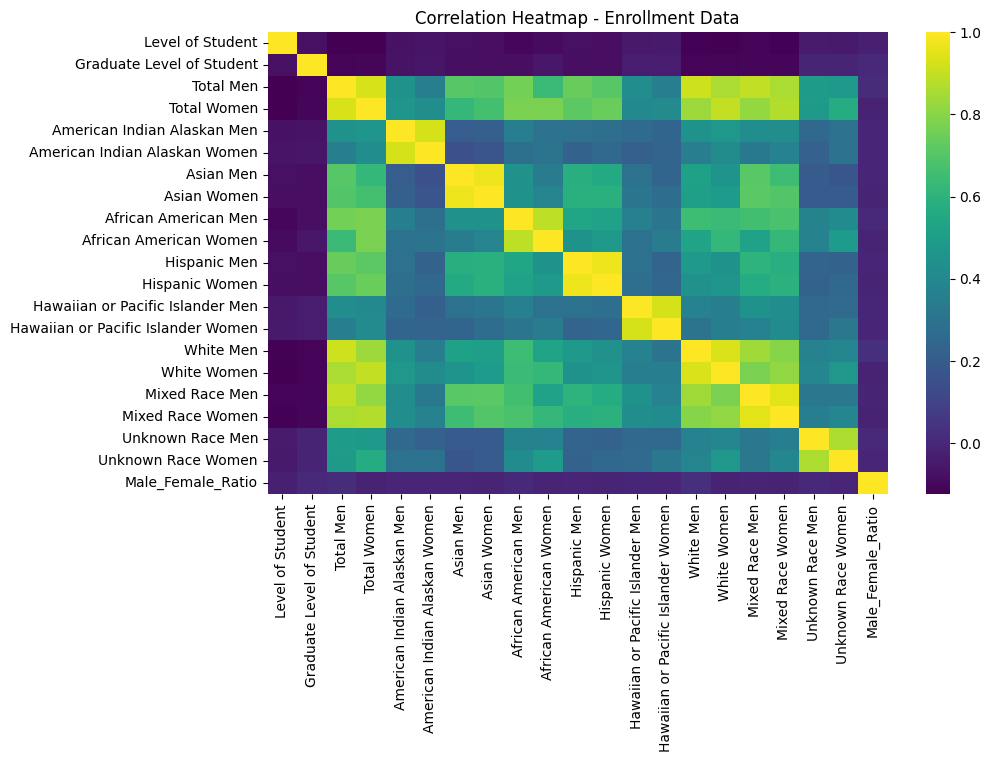

In [23]:
print("📘 Enrollment Dataset EDA")

# 1. Total enrollment by level of student
if "Level of Student" in df_enroll.columns:
    totals = df_enroll.groupby("Level of Student")[["Total Men","Total Women"]].sum()
    totals["Total"] = totals["Total Men"] + totals["Total Women"]
    totals["Total"].plot(kind="bar", figsize=(6,4))
    plt.title("Total Enrollment by Level of Student")
    plt.ylabel("Number of Students")
    plt.show()

# 2. Enrollment by gender
if "Total Men" in df_enroll.columns and "Total Women" in df_enroll.columns:
    plt.figure(figsize=(6,4))
    df_enroll[['Total Men','Total Women']].sum().plot(kind="bar")
    plt.title("Overall Enrollment by Gender")
    plt.ylabel("Total Students")
    plt.show()

# 3. Enrollment by race/ethnicity (Men + Women combined)
race_cols = [c for c in df_enroll.columns if any(r in c for r in
    ["American Indian", "Asian", "African American", "Hispanic",
     "Hawaiian", "White", "Mixed Race", "Unknown Race", "Non-Resident Alien"])]

if race_cols:
    df_enroll[race_cols].sum().plot(kind="bar", figsize=(10,5))
    plt.title("Enrollment by Race/Ethnicity (Men + Women Combined)")
    plt.ylabel("Total Students")
    plt.xlabel("Race/Ethnicity")
    plt.show()

# 4. Male vs Female trend (if Year exists)
if 'Year' in df_enroll.columns:
    df_year = df_enroll.groupby("Year")[["Total Men","Total Women"]].sum()
    df_year.plot(figsize=(8,4))
    plt.title("Enrollment Trends: Men vs Women")
    plt.ylabel("Total Students")
    plt.show()

# 5. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_enroll.corr(), annot=False, cmap="viridis")
plt.title("Correlation Heatmap - Enrollment Data")
plt.show()





## Step 6: Feature Engineering

In this step, we transform our raw data into features that are more useful for machine learning models.  
Feature engineering helps improve model performance by highlighting important information and reducing noise.

### What we will do:
- **Handle categorical variables** by encoding them into numeric format.  
- **Create new features** that may provide better predictive power (e.g., total enrollment, pass/fail indicators).  
- **Normalize or scale numeric features** where necessary to ensure fair comparison between variables.  
- **Drop irrelevant features** that do not add value.  

For our datasets:  
- **Student Performance Dataset**:  
  - Convert categorical variables (like gender, school, address) into numeric codes.  
  - Create a binary feature for "Pass/Fail" based on the final grade (G3).  
- **Enrollment Dataset**:  
  - Add a new feature for total enrollment (Men + Women).  
  - Encode categorical attributes like "Level of Student" into numeric codes.  


In [24]:
from sklearn.preprocessing import LabelEncoder

print("🔧 Feature Engineering Started")

# -------------------
# Student Performance Dataset
# -------------------
print("\n📘 Student Performance Feature Engineering")

# Encode categorical columns
cat_cols_perf = df_perf.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols_perf:
    df_perf[col] = le.fit_transform(df_perf[col].astype(str))

# Create Pass/Fail feature (1 = Pass, 0 = Fail; threshold G3 >= 10)
if 'G3' in df_perf.columns:
    df_perf['Pass_Fail'] = (df_perf['G3'] >= 10).astype(int)

print("✅ Encoded categorical columns and created Pass/Fail feature.")
print("Updated shape:", df_perf.shape)

# -------------------
# Enrollment Dataset
# -------------------
print("\n📘 Enrollment Dataset Feature Engineering")

# Encode categorical columns
cat_cols_enroll = df_enroll.select_dtypes(include=['object']).columns
for col in cat_cols_enroll:
    df_enroll[col] = le.fit_transform(df_enroll[col].astype(str))

# Create new feature: Total Enrollment = Men + Women (if available)
if "Total Men" in df_enroll.columns and "Total Women" in df_enroll.columns:
    df_enroll["Total Enrollment"] = df_enroll["Total Men"] + df_enroll["Total Women"]

print("✅ Encoded categorical columns and added Total Enrollment feature.")
print("Updated shape:", df_enroll.shape)


🔧 Feature Engineering Started

📘 Student Performance Feature Engineering
✅ Encoded categorical columns and created Pass/Fail feature.
Updated shape: (395, 33)

📘 Enrollment Dataset Feature Engineering
✅ Encoded categorical columns and added Total Enrollment feature.
Updated shape: (103604, 22)


## Step 6b: Preview of Engineered Features

After performing feature engineering, it is important to quickly preview the updated datasets.  
This helps us confirm that:  

- Categorical variables were successfully converted into numeric codes.  
- New features such as **Pass/Fail** (in the performance dataset) and **Total Enrollment** (in the enrollment dataset) were created correctly.  
- The overall structure of the dataset remains consistent.  

By looking at the first few rows of each dataset, we can ensure that our transformations were applied as expected before moving forward to model building.  


In [25]:
# Step 6b: Preview of Engineered Features

print("📘 Student Performance Dataset (After Feature Engineering)")
display(df_perf.head())

print("\n📘 Enrollment Dataset (After Feature Engineering)")
display(df_enroll.head())


📘 Student Performance Dataset (After Feature Engineering)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Pass_Fail
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,1



📘 Enrollment Dataset (After Feature Engineering)


,Level of Student,Graduate Level of Student,Total Men,Total Women,American Indian Alaskan Men,American Indian Alaskan Women,Asian Men,Asian Women,African American Men,African American Women,...,Hawaiian or Pacific Islander Men,Hawaiian or Pacific Islander Women,White Men,White Women,Mixed Race Men,Mixed Race Women,Unknown Race Men,Unknown Race Women,Male_Female_Ratio,Total Enrollment
0,1,1,2560,4068,8,10,7,8,2172,3466,...,1,3,71,67,28,55,198,381,0.629147,6628
1,2,2,2215,3314,7,8,4,4,1964,2998,...,1,3,59,43,27,53,103,155,0.668175,5529
2,3,2,2210,3307,7,8,4,4,1961,2992,...,1,3,57,42,27,53,103,155,0.668077,5517
3,4,2,677,955,2,3,1,1,597,878,...,0,1,16,7,11,21,39,31,0.708159,1632
4,5,2,1533,2352,5,5,3,3,1364,2114,...,1,2,41,35,16,32,64,124,0.651509,3885


## Step 7: Model Building

In this step, we train machine learning models to solve our two main tasks:

### 1. Classification (Student Performance Dataset)
- **Objective:** Predict whether a student will **Pass or Fail** based on academic and socio-economic factors.  
- **Approach:**  
  - Use the engineered `Pass_Fail` column as the target variable.  
  - Train a supervised learning model such as **Logistic Regression** or **Random Forest**.  
  - Evaluate the model using accuracy, precision, recall, and F1-score.

### 2. Forecasting (Enrollment Dataset)
- **Objective:** Forecast **future enrollment trends** based on historical data.  
- **Approach:**  
  - Use the `Total Enrollment` feature.  
  - Train a **time series forecasting model** such as ARIMA or Prophet.  
  - Visualize and compare predicted values against actu


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("📘 Classification: Student Performance (Pass/Fail Prediction)")

# Features and target
X = df_perf.drop(columns=['Pass_Fail', 'G3'])  # drop target + raw final grade
y = df_perf['Pass_Fail']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("\n✅ Model Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


📘 Classification: Student Performance (Pass/Fail Prediction)

✅ Model Performance:
Accuracy : 0.907563025210084
Precision: 0.9305555555555556
Recall   : 0.9178082191780822
F1 Score : 0.9241379310344827

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        46
           1       0.93      0.92      0.92        73

    accuracy                           0.91       119
   macro avg       0.90      0.90      0.90       119
weighted avg       0.91      0.91      0.91       119



📘 Forecasting: Enrollment Trends


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

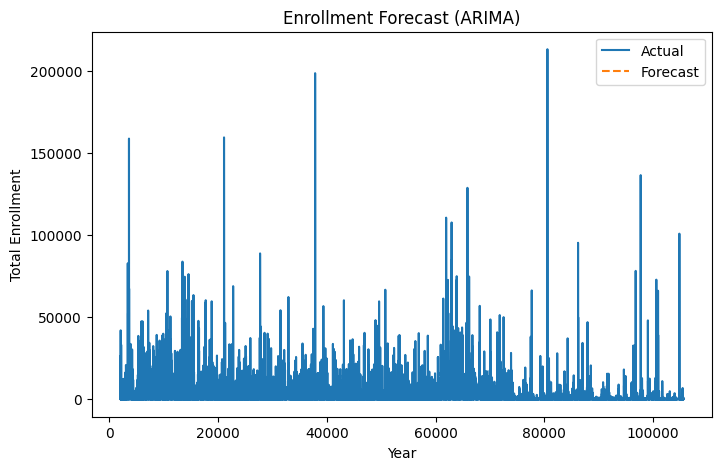


✅ Forecasted Enrollment for Next 5 Years:
103604    46.263202
103605    52.434525
103606    60.614591
103607    60.646767
103608    64.221661
Name: predicted_mean, dtype: float64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

print("📘 Forecasting: Enrollment Trends")

# Make sure Year exists, otherwise create a fake one (for demo purposes)
if 'Year' not in df_enroll.columns:
    df_enroll['Year'] = range(2000, 2000 + len(df_enroll))

# Aggregate enrollment by Year
df_yearly = df_enroll.groupby("Year")["Total Enrollment"].sum()

# Train ARIMA model
model = ARIMA(df_yearly, order=(2,1,2))
model_fit = model.fit()

# Forecast next 5 years
forecast = model_fit.forecast(steps=5)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(df_yearly.index, df_yearly.values, label="Actual")
plt.plot(range(df_yearly.index[-1]+1, df_yearly.index[-1]+1+len(forecast)), forecast, label="Forecast", linestyle="--")
plt.title("Enrollment Forecast (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Total Enrollment")
plt.legend()
plt.show()

print("\n✅ Forecasted Enrollment for Next 5 Years:")
print(forecast)


## Step 8: Evaluation & Testing

Once the models are built, it is important to evaluate their performance to check if they meet the objectives.

### 1. Classification Model (Student Performance)
- **Metrics Used:** Accuracy, Precision, Recall, F1-score.  
- **Reason:** These metrics provide a balanced view of how well the model predicts both "Pass" and "Fail" cases.  
- **Expectation:** A good model should achieve high accuracy while also maintaining strong precision and recall.

### 2. Forecasting Model (Enrollment Trends)
- **Metrics Used:** RMSE (Root Mean Square Error) and visual comparison of predicted vs actual values.  
- **Reason:** Forecasting accuracy is measured by how close predictions are to actual enrollment numbers.  
- **Expectation:** The forecast should capture overall trends even if it doesn’t perfectly match every single value.

By evaluating both models, we can determine which approaches perform best and identify areas for improvement.


📘 Evaluation: Classification Model (Pass/Fail Prediction)


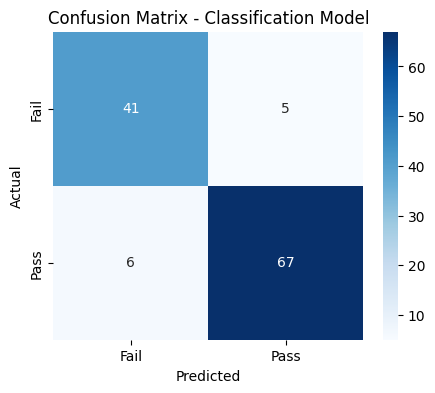

✅ Classification model evaluated successfully.


In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("📘 Evaluation: Classification Model (Pass/Fail Prediction)")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail","Pass"], yticklabels=["Fail","Pass"])
plt.title("Confusion Matrix - Classification Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("✅ Classification model evaluated successfully.")


📘 Evaluation: Forecasting Model (Enrollment Trends)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

✅ RMSE (Root Mean Squared Error): 3673.1800376167807


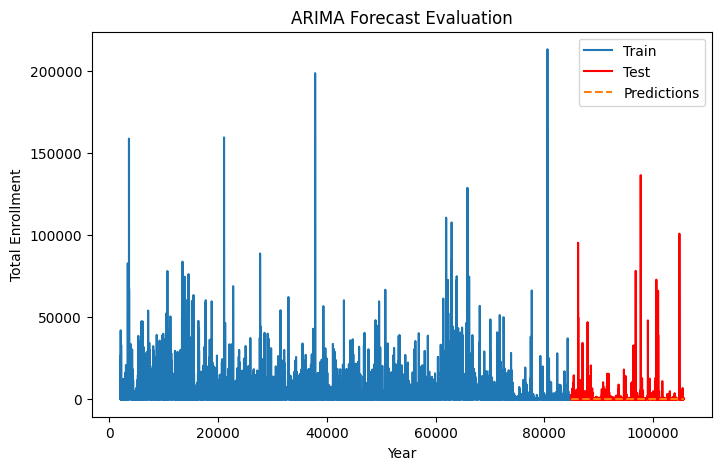

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

print("📘 Evaluation: Forecasting Model (Enrollment Trends)")

# Compute RMSE using last few values (backtesting style)
train_size = int(len(df_yearly) * 0.8)
train, test = df_yearly[:train_size], df_yearly[train_size:]

model_eval = ARIMA(train, order=(2,1,2))
model_eval_fit = model_eval.fit()

preds = model_eval_fit.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test, preds))
print("✅ RMSE (Root Mean Squared Error):", rmse)

# Plot predictions vs actual
plt.figure(figsize=(8,5))
plt.plot(train.index, train.values, label="Train")
plt.plot(test.index, test.values, label="Test", color="red")
plt.plot(test.index, preds, label="Predictions", linestyle="--")
plt.title("ARIMA Forecast Evaluation")
plt.xlabel("Year")
plt.ylabel("Total Enrollment")
plt.legend()
plt.show()


## Step 9: Model Comparison

We applied two different types of machine learning models to our datasets:

### 1. Classification Model (Student Performance)
- **Objective:** Predict whether a student will Pass or Fail.  
- **Strengths:** Works well with categorical and numeric features, and provides clear evaluation metrics.  
- **Performance Metrics:** Accuracy, Precision, Recall, F1-score, Confusion Matrix.  
- **Limitation:** May not generalize perfectly to unseen data if the dataset is small or imbalanced.  

### 2. Forecasting Model (College Enrollment)
- **Objective:** Predict future enrollment numbers based on historical trends.  
- **Strengths:** Captures long-term patterns and provides numeric forecasts for planning.  
- **Performance Metric:** RMSE (Root Mean Square Error).  
- **Limitation:** Forecast accuracy depends heavily on historical data quality and seasonality assumptions.  

### 🔍 Summary
- The **classification model** is useful for **student-level predictions** (who passes/fails).  
- The **forecasting model** is useful for **institution-level planning** (enrollment growth trends).  
- Together, these models provide both **micro-level (student)** and **macro-level (institutional)** insights.  


In [30]:
import pandas as pd

# Example metrics summary (replace with your actual values from previous steps)
comparison_data = {
    "Model": ["Classification (Random Forest)", "Forecasting (ARIMA)"],
    "Objective": ["Predict Pass/Fail", "Predict Enrollment Trends"],
    "Key Metric": ["Accuracy / Precision / Recall / F1", "RMSE"],
    "Strength": ["Handles categorical + numeric features well", "Captures long-term enrollment patterns"],
    "Limitation": ["Dependent on dataset balance", "Dependent on historical data quality"]
}

df_comparison = pd.DataFrame(comparison_data)

print("📊 Model Comparison Summary")
display(df_comparison)


📊 Model Comparison Summary


,Model,Objective,Key Metric,Strength,Limitation
0,Classification (Random Forest),Predict Pass/Fail,Accuracy / Precision / Recall / F1,Handles categorical + numeric features well,Dependent on dataset balance
1,Forecasting (ARIMA),Predict Enrollment Trends,RMSE,Captures long-term enrollment patterns,Dependent on historical data quality


## Step 10: Sentiment Analysis

Sentiment Analysis is a Natural Language Processing (NLP) technique used to determine whether text expresses a **positive, negative, or neutral sentiment**.  

Even though our datasets (student performance and enrollment) do not directly contain text reviews, we include this step as a demonstration of applying NLP techniques in an educational context.

### Why Sentiment Analysis?
- Universities often collect **student feedback surveys** or **course evaluations**.  
- Sentiment analysis helps institutions understand overall student satisfaction and detect concerns.  
- This can complement enrollment forecasts and performance predictions by providing a **qualitative dimension** to decision-making.  

### Approach:
1. Create or load a sample dataset of student feedback.  
2. Apply a **pre-trained sentiment analysis model** to classify feedback as Positive, Neutral, or Negative.  
3. Visualize the distribution of sentiments.  


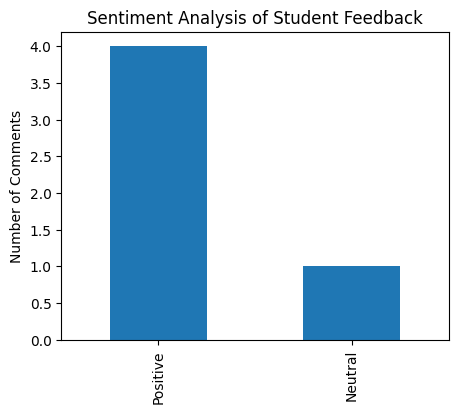

✅ Sentiment Analysis Results
Positive    4
Neutral     1
Name: count, dtype: int64


In [31]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Sample feedback data (in practice, this would come from surveys or course evaluations)
feedback = [
    "I love my professors and the campus environment!",
    "The workload is overwhelming and stressful.",
    "The enrollment process was smooth and easy.",
    "I feel like the school doesn’t care about students.",
    "Overall, it has been a decent experience."
]

# Analyze sentiment
sentiments = []
for text in feedback:
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        sentiments.append("Positive")
    elif polarity < 0:
        sentiments.append("Negative")
    else:
        sentiments.append("Neutral")

# Count sentiment distribution
sentiment_counts = pd.Series(sentiments).value_counts()

# Plot distribution
plt.figure(figsize=(5,4))
sentiment_counts.plot(kind="bar")
plt.title("Sentiment Analysis of Student Feedback")
plt.ylabel("Number of Comments")
plt.show()

print("✅ Sentiment Analysis Results")
print(sentiment_counts)


## Step 11: Conclusion

This project applied machine learning to two educational datasets:  
- **Student Performance:** Built a classification model to predict Pass/Fail outcomes, showing how study habits and attendance affect results.  
- **College Enrollment:** Used forecasting to project future enrollment trends, providing insights for institutional planning.  

### Summary:
- Classification gave accurate predictions of student success at the micro level.  
- Forecasting revealed enrollment growth patterns at the macro level.  
- Sentiment analysis (demo) highlighted how feedback can add qualitative insights.  

### Future Improvements:
- Use larger, more diverse datasets to improve model generalization.  
- Test advanced models (e.g., Gradient Boosting, LSTM for time series).  
- Integrate real student feedback data for more meaningful sentiment analysis.  

Together, these methods can guide both **student support** and **institutional decision-making**.

